In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def corr2d(X,K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0]-h+1,X.shape[1]-w+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h,j:j+w] * K).sum()
    return Y

In [3]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [4]:
class Conv2D(nn.Module):
    def __init__(self,kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self,x):
        return corr2d(x,self,weight) + self.bias

In [5]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [6]:
K = torch.tensor([[1.0,-1.0]])
Y = corr2d(X,K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [7]:
corr2d(X.t(),K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [8]:
conv2d = nn.Conv2d(1,1,kernel_size = (1,2), bias = False)

X = X.reshape((1,1,6,8))
Y = Y.reshape((1,1,6,7))
lr = 3e-2

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat-Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()

    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'eopch{i+1}, loss{l.sum():.3f},{Y_hat}')

eopch2, loss4.715,tensor([[[[ 0.1274,  0.4533,  0.0000,  0.0000,  0.0000, -0.3258,  0.1274],
          [ 0.1274,  0.4533,  0.0000,  0.0000,  0.0000, -0.3258,  0.1274],
          [ 0.1274,  0.4533,  0.0000,  0.0000,  0.0000, -0.3258,  0.1274],
          [ 0.1274,  0.4533,  0.0000,  0.0000,  0.0000, -0.3258,  0.1274],
          [ 0.1274,  0.4533,  0.0000,  0.0000,  0.0000, -0.3258,  0.1274],
          [ 0.1274,  0.4533,  0.0000,  0.0000,  0.0000, -0.3258,  0.1274]]]],
       grad_fn=<ConvolutionBackward0>)
eopch4, loss0.850,tensor([[[[ 0.0816,  0.7907,  0.0000,  0.0000,  0.0000, -0.7092,  0.0816],
          [ 0.0816,  0.7907,  0.0000,  0.0000,  0.0000, -0.7092,  0.0816],
          [ 0.0816,  0.7907,  0.0000,  0.0000,  0.0000, -0.7092,  0.0816],
          [ 0.0816,  0.7907,  0.0000,  0.0000,  0.0000, -0.7092,  0.0816],
          [ 0.0816,  0.7907,  0.0000,  0.0000,  0.0000, -0.7092,  0.0816],
          [ 0.0816,  0.7907,  0.0000,  0.0000,  0.0000, -0.7092,  0.0816]]]],
       grad_fn=<Con

In [9]:
def comp_conv2d(conv2d,X):
    X = X.reshape((1,1) + X.shape)
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:])

conv2d = nn.Conv2d(1,1,kernel_size = 3, padding = 1)
X = torch.rand(size = (8,8))
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

In [10]:
conv2d = nn.Conv2d(1,1,kernel_size = (5,3), padding = (2,1))
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

In [11]:
# 步幅
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [12]:
def corr2d_multi_in(X,K):
    return sum(d2l.corr2d(x,k) for x, k in zip(X,K))

for x, k in zip(X,K):
    print(x,x.shape,k,k.shape)

tensor([0.0516, 0.8569, 0.5611, 0.8949, 0.4644, 0.3323, 0.5254, 0.9938]) torch.Size([8]) tensor([ 1., -1.]) torch.Size([2])


In [13]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
 [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])
print(X,X.shape)
print(K,K.shape)
corr2d_multi_in(X, K)

tensor([[[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]],

        [[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]]) torch.Size([2, 3, 3])
tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]]) torch.Size([2, 2, 2])


tensor([[ 56.,  72.],
        [104., 120.]])

In [14]:
def corr2d_multi_in_out(X,K):
    return torch.stack([corr2d_multi_in(X,k) for k in K],0)
print(K,K.shape)
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])
K = torch.stack((K,K + 1,K + 2),0)
k,K.shape


tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]]) torch.Size([2, 2, 2])


(tensor([ 1., -1.]), torch.Size([3, 2, 2, 2]))

In [15]:
a = corr2d_multi_in_out(X,K)
a, a.shape

(tensor([[[ 56.,  72.],
          [104., 120.]],
 
         [[ 76., 100.],
          [148., 172.]],
 
         [[ 96., 128.],
          [192., 224.]]]),
 torch.Size([3, 2, 2]))

In [16]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i,h * w))
    K = K.reshape((c_o,c_i))
    Y = torch.matmul(K,X)
    return Y.reshape((c_o,h,w))

X = torch.normal(0,1,(3,3,3))
K = torch.normal(0,1,(2,3,1,1))
Y1 = corr2d_multi_in_out_1x1(X,K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1- Y2).sum()) < 1e-6

In [17]:
def pool2d(X, pool_size, mode = 'max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i,j] = X[i:i+p_h,j:j+p_w].max()
            elif mode == 'avg':
                Y[i,j] = X[i:i+p_h,j:j+p_h].mean()
    return Y

X = torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
pool2d(X,(2,2))

tensor([[4., 5.],
        [7., 8.]])

In [18]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
print(X)
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])


tensor([[[[10.]]]])

In [19]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [20]:
X = torch.cat((X, X + 1), 1)
X 

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [21]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

In [22]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1,6,kernel_size = 5, padding = 2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5,120),
    nn.Sigmoid(),
    nn.Linear(120,84),
    nn.Sigmoid(),
    nn.Linear(84,10)
)



In [23]:
X = torch.rand(size=(1,1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape : \t',X.shape)

Conv2d output shape : 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape : 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape : 	 torch.Size([1, 6, 14, 14])
Conv2d output shape : 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape : 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape : 	 torch.Size([1, 16, 5, 5])
Flatten output shape : 	 torch.Size([1, 400])
Linear output shape : 	 torch.Size([1, 120])
Sigmoid output shape : 	 torch.Size([1, 120])
Linear output shape : 	 torch.Size([1, 84])
Sigmoid output shape : 	 torch.Size([1, 84])
Linear output shape : 	 torch.Size([1, 10])


In [24]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size = batch_size)

In [25]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval() # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [26]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr = lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                         legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X,y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat,y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y),X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches- 1:
                animator.add(epoch + (i + 1) / num_batches,
                                   (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
                    f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
                    f'on {str(device)}')

loss 0.454, train acc 0.831, test acc 0.825
49307.8 examples/sec on cuda:0


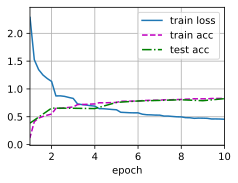

In [27]:
lr, num_epochs = 0.9, 10
train_ch6(net,train_iter,test_iter, num_epochs, lr, d2l.try_gpu())